**SIMULATED ANNEALING ALGORITHM**

**rat99 Dataset (Optimal Solution -  1211)**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import time

**Define Coordinate Class**

In [2]:
class Coordinate:
    def __init__(self, x, y):
        self.x = x
        self.y = y
    
    #Calculate Euclidean distance between two coordinates
    @staticmethod
    def get_distance(a, b):
        return math.sqrt((a.x - b.x) ** 2 + (a.y - b.y) ** 2)
    
    #Compute total distance for a given route
    @staticmethod
    def get_total_distance(coords):
        dist = sum(Coordinate.get_distance(a, b) for a, b in zip(coords[:-1], coords[1:]))
        dist += Coordinate.get_distance(coords[0], coords[-1])
        return dist

**Load Dataset**

In [3]:
coordinates = [
    (6, 4), (15, 15), (24, 18), (33, 12), (48, 12), (57, 14), (67, 10), (77, 10), (86, 15),
    (6, 21), (17, 26), (23, 25), (32, 35), (43, 23), (55, 35), (65, 36), (78, 39), (87, 35),
    (3, 53), (12, 44), (28, 53), (33, 49), (47, 46), (55, 52), (64, 50), (71, 57), (87, 57),
    (4, 72), (15, 78), (22, 70), (34, 71), (42, 79), (54, 77), (66, 79), (78, 67), (87, 73),
    (7, 81), (17, 95), (26, 98), (32, 97), (43, 88), (57, 89), (64, 85), (78, 83), (83, 98),
    (5, 109), (13, 111), (25, 102), (38, 119), (46, 107), (58, 110), (67, 110), (74, 113),
    (88, 110), (2, 124), (17, 134), (23, 129), (36, 131), (42, 137), (53, 123), (63, 135),
    (72, 134), (87, 129), (2, 146), (16, 147), (25, 153), (38, 155), (42, 158), (57, 154),
    (66, 151), (73, 151), (86, 149), (5, 177), (13, 162), (25, 169), (35, 177), (46, 172),
    (54, 166), (65, 174), (73, 161), (86, 162), (2, 195), (14, 196), (28, 189), (38, 187),
    (46, 195), (57, 194), (63, 188), (77, 193), (85, 194), (8, 211), (12, 217), (22, 210),
    (34, 216), (47, 203), (58, 213), (66, 206), (78, 210), (85, 204)
]




**Simulated Annealing Algorithm**

In [4]:
#SA params: 
# T0 = initial temperature
# r = cooling rate 
# max_iterations = max number of iterations

def Simulated(T0=40000, r=0.80, max_iterations=1000):

    #Turns dataset into Coordinate objects
    coords = [Coordinate(x, y) for x, y in coordinates]

    best_route = coords[:]
    best_distance = Coordinate.get_total_distance(coords)

    start_time = time.time()
    T = T0

    for _ in range(max_iterations):
        L = np.random.randint(10, 31)
        for _ in range(L):
            r1, r2 = np.random.randint(0, len(coords), size=2) 
            coords[r1], coords[r2] = coords[r2], coords[r1]

            current_distance = Coordinate.get_total_distance(coords) #swap cities

            #Acceptance probability
            if current_distance < best_distance or np.random.uniform() < np.exp((best_distance - current_distance) / T):
                best_distance = current_distance
                best_route = coords[:]
            else:
                coords[r1], coords[r2] = coords[r2], coords[r1] #revert swap

        T *= r
    
    best_route.append(best_route[0])

    end_time = time.time()
    cpu_time = end_time - start_time

    best_tour_indices = [coordinates.index((c.x, c.y)) for c in best_route]

    print(f"Best Tour: {best_tour_indices}")
    print(f"Best Length: {best_distance:.2f}")
    print(f"CPU Time: {cpu_time:.4f} seconds")

    fig, ax = plt.subplots(figsize=(10, 6))

    for first, second in zip(best_route[:-1], best_route[1:]):
        ax.plot([first.x, second.x], [first.y, second.y], 'b')
    ax.plot([best_route[0].x, best_route[-1].x], [best_route[0].y, best_route[-1].y], 'b')

    for i, c in enumerate(best_route):
        ax.plot(c.x, c.y, 'ro')
        ax.text(c.x + 1, c.y + 1, f'{i}', color='black', fontsize=8)

    ax.set_title('Simulated Annealing for Symmetric TSP')
    ax.set_xlabel('X Coordinate')
    ax.set_ylabel('Y Coordinate')
    plt.show()


Implementations

1st

Best Tour: [0, 9, 19, 18, 46, 55, 64, 65, 67, 76, 75, 84, 85, 94, 93, 92, 26, 17, 8, 7, 16, 53, 62, 69, 68, 79, 78, 88, 89, 80, 71, 70, 61, 33, 32, 30, 31, 50, 51, 52, 44, 42, 41, 40, 38, 37, 36, 27, 29, 25, 34, 35, 43, 60, 58, 66, 74, 82, 91, 90, 81, 72, 73, 83, 86, 95, 96, 97, 98, 87, 77, 63, 54, 45, 10, 11, 12, 28, 56, 57, 48, 59, 49, 47, 39, 4, 5, 6, 14, 15, 24, 23, 22, 21, 20, 13, 3, 2, 1, 0]
Best Length: 2206.48
CPU Time: 3.3312 seconds


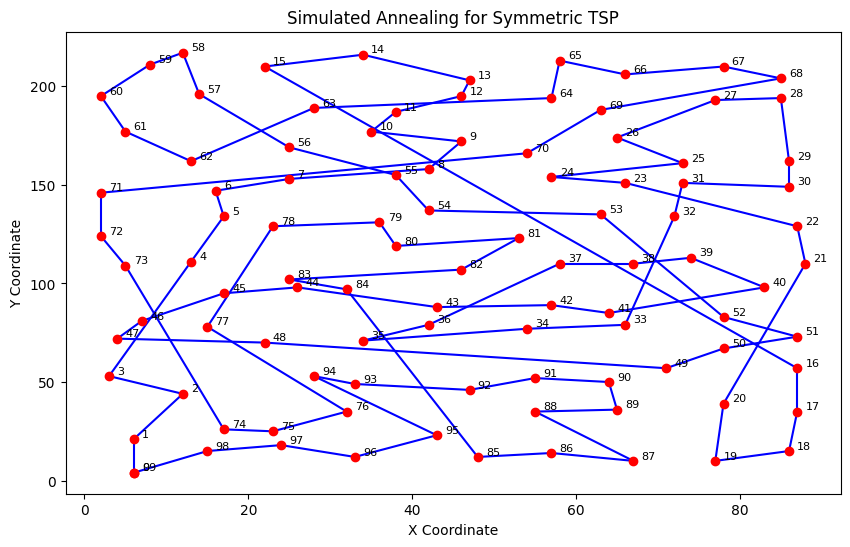

In [5]:
Simulated()

2nd

Best Tour: [64, 73, 72, 81, 82, 92, 65, 47, 38, 30, 20, 10, 9, 0, 1, 12, 21, 22, 31, 40, 78, 88, 89, 98, 97, 83, 74, 55, 46, 37, 36, 28, 39, 68, 87, 86, 96, 95, 94, 85, 75, 57, 29, 19, 18, 27, 45, 54, 63, 90, 91, 93, 84, 76, 77, 67, 66, 58, 32, 33, 42, 69, 70, 79, 80, 71, 62, 44, 35, 26, 17, 8, 7, 6, 15, 16, 24, 23, 13, 11, 2, 3, 4, 5, 14, 25, 34, 43, 53, 51, 52, 61, 60, 59, 50, 41, 49, 48, 56, 64]
Best Length: 2144.76
CPU Time: 2.9762 seconds


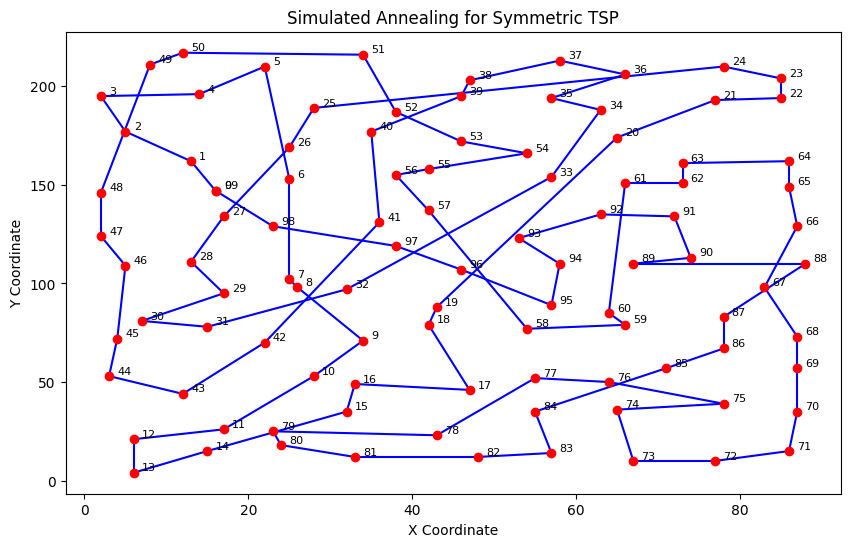

In [6]:
Simulated()

3rd

Best Tour: [11, 10, 9, 1, 0, 6, 7, 8, 43, 50, 51, 52, 62, 71, 68, 77, 78, 87, 93, 92, 91, 90, 83, 75, 59, 49, 32, 23, 15, 17, 16, 24, 25, 34, 26, 35, 44, 53, 61, 69, 79, 88, 98, 89, 80, 70, 60, 42, 33, 41, 39, 38, 47, 57, 86, 96, 97, 56, 28, 27, 18, 19, 12, 4, 5, 14, 40, 58, 66, 67, 76, 85, 95, 94, 84, 74, 73, 63, 54, 37, 30, 21, 20, 29, 36, 45, 46, 55, 64, 72, 81, 82, 65, 48, 31, 22, 13, 3, 2, 11]
Best Length: 2216.78
CPU Time: 2.4717 seconds


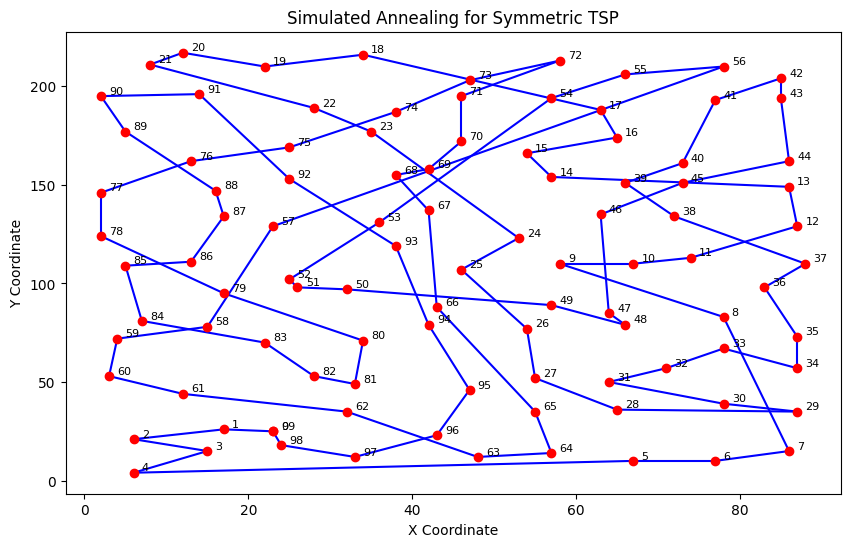

In [7]:
Simulated()

4th

Best Tour: [20, 21, 22, 23, 71, 80, 89, 98, 97, 88, 78, 79, 70, 69, 68, 77, 58, 56, 55, 65, 66, 67, 76, 75, 84, 83, 82, 74, 73, 64, 63, 54, 19, 10, 9, 18, 27, 36, 28, 37, 38, 40, 32, 33, 42, 43, 44, 53, 62, 85, 93, 92, 91, 90, 81, 72, 59, 51, 52, 86, 96, 95, 94, 57, 48, 47, 39, 49, 35, 34, 25, 16, 5, 4, 13, 30, 29, 45, 46, 31, 6, 7, 8, 17, 26, 61, 87, 60, 50, 41, 24, 15, 14, 3, 0, 1, 2, 11, 12, 20]
Best Length: 2252.93
CPU Time: 2.4419 seconds


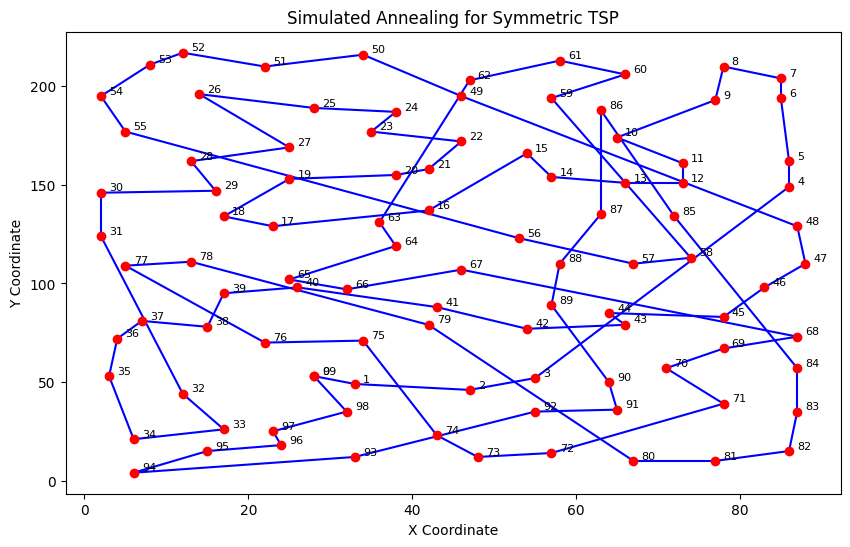

In [8]:
Simulated()

5th

Best Tour: [25, 16, 15, 5, 4, 3, 9, 18, 45, 81, 90, 91, 92, 93, 95, 97, 80, 71, 61, 62, 53, 42, 41, 40, 39, 38, 55, 64, 73, 84, 86, 87, 96, 94, 85, 36, 27, 29, 28, 37, 47, 48, 57, 56, 65, 66, 67, 58, 59, 50, 51, 52, 44, 43, 35, 34, 26, 17, 8, 7, 6, 23, 46, 54, 63, 72, 82, 83, 78, 68, 49, 30, 20, 19, 10, 11, 22, 70, 79, 89, 98, 88, 69, 32, 24, 14, 13, 2, 0, 1, 12, 21, 31, 74, 75, 76, 77, 60, 33, 25]
Best Length: 2413.38
CPU Time: 2.7732 seconds


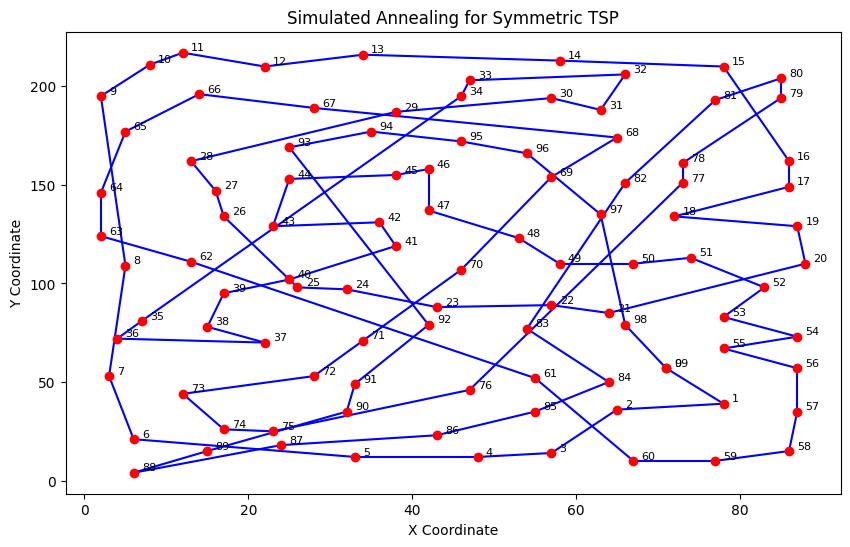

In [9]:
Simulated()

6th

Best Tour: [26, 16, 17, 8, 7, 6, 5, 72, 81, 90, 82, 63, 54, 37, 30, 32, 15, 14, 11, 1, 0, 9, 19, 18, 47, 38, 49, 50, 41, 40, 31, 21, 12, 20, 39, 48, 59, 60, 77, 76, 67, 66, 58, 57, 56, 55, 64, 65, 73, 74, 75, 84, 94, 85, 61, 51, 52, 44, 33, 34, 25, 24, 23, 22, 29, 28, 46, 45, 36, 27, 10, 2, 3, 4, 13, 42, 78, 87, 86, 97, 98, 80, 71, 70, 79, 89, 88, 96, 95, 93, 91, 92, 83, 68, 69, 62, 53, 43, 35, 26]
Best Length: 2161.68
CPU Time: 3.3438 seconds


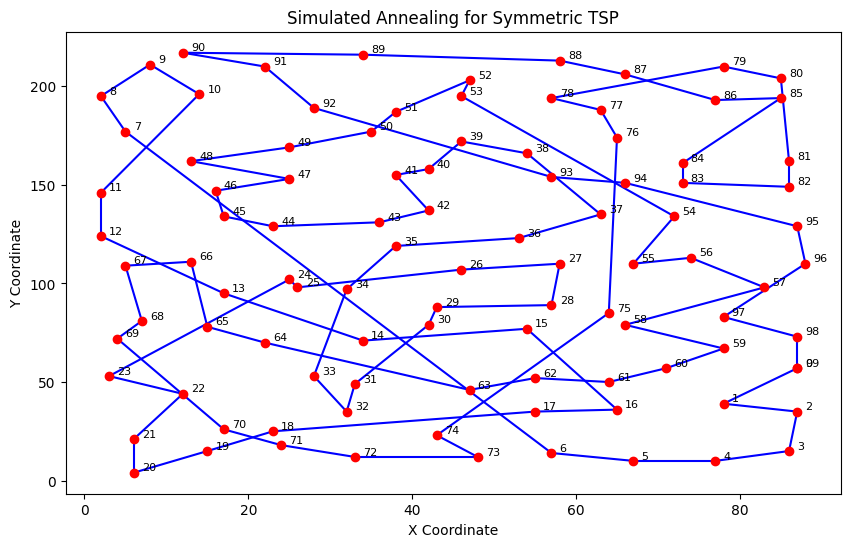

In [10]:
Simulated()

7th

Best Tour: [94, 83, 72, 73, 37, 28, 19, 10, 3, 4, 16, 26, 35, 43, 34, 42, 33, 52, 51, 41, 32, 23, 22, 31, 39, 59, 61, 71, 62, 53, 12, 11, 2, 1, 0, 9, 18, 27, 36, 54, 63, 64, 56, 24, 7, 6, 8, 17, 25, 44, 70, 69, 68, 85, 84, 75, 76, 77, 67, 74, 92, 93, 95, 88, 80, 60, 48, 49, 50, 47, 38, 30, 21, 14, 15, 5, 13, 20, 29, 40, 57, 66, 65, 55, 45, 46, 58, 79, 78, 87, 91, 90, 81, 82, 86, 89, 98, 97, 96, 94]
Best Length: 2349.49
CPU Time: 2.4705 seconds


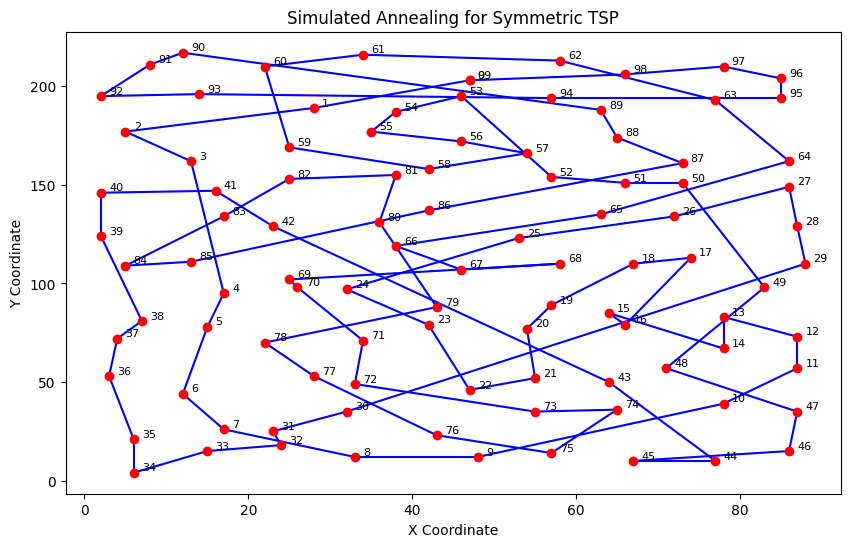

In [11]:
Simulated()

8th

Best Tour: [6, 7, 8, 17, 16, 59, 77, 76, 87, 84, 75, 66, 67, 13, 12, 11, 10, 2, 1, 9, 0, 3, 4, 5, 14, 15, 25, 80, 98, 97, 95, 94, 86, 96, 89, 88, 78, 79, 69, 39, 30, 22, 21, 37, 45, 54, 63, 73, 72, 81, 90, 91, 92, 93, 85, 83, 82, 74, 65, 49, 41, 35, 26, 34, 33, 32, 42, 43, 44, 53, 52, 51, 31, 29, 27, 36, 28, 40, 62, 71, 70, 61, 50, 18, 19, 20, 38, 47, 48, 68, 60, 58, 57, 64, 55, 56, 46, 23, 24, 6]
Best Length: 2314.35
CPU Time: 2.4984 seconds


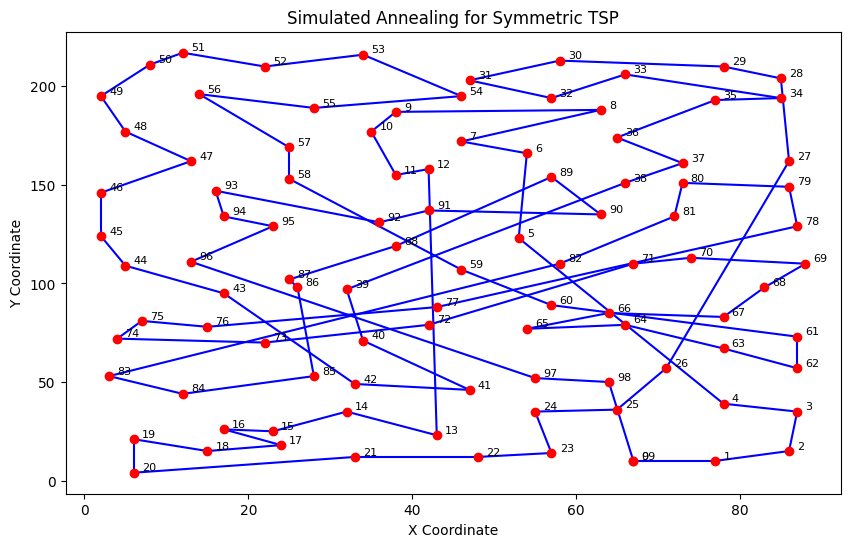

In [12]:
Simulated()

9th

Best Tour: [72, 73, 64, 66, 67, 76, 87, 78, 77, 61, 60, 58, 65, 74, 84, 83, 75, 48, 30, 29, 20, 21, 25, 34, 33, 42, 50, 59, 62, 53, 26, 8, 7, 6, 3, 2, 12, 14, 15, 17, 16, 24, 22, 23, 32, 41, 52, 51, 43, 35, 44, 71, 80, 89, 98, 96, 86, 28, 36, 27, 18, 19, 10, 9, 0, 1, 11, 13, 5, 4, 85, 94, 93, 92, 63, 54, 45, 46, 37, 47, 38, 39, 31, 40, 49, 56, 55, 57, 68, 69, 70, 79, 88, 97, 95, 91, 90, 82, 81, 72]
Best Length: 2162.24
CPU Time: 2.8983 seconds


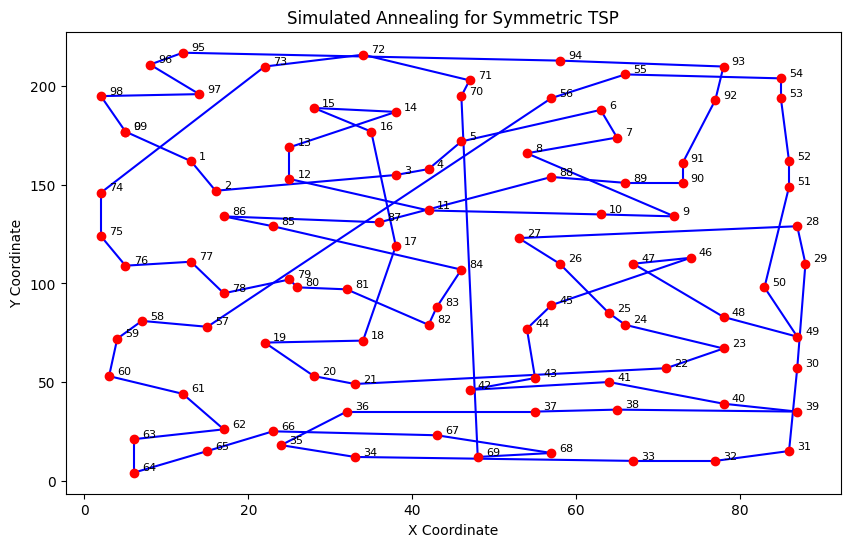

In [13]:
Simulated()

10th

Best Tour: [95, 96, 78, 79, 70, 69, 61, 60, 59, 49, 46, 45, 54, 63, 73, 97, 98, 89, 88, 87, 85, 84, 75, 65, 32, 14, 5, 6, 7, 8, 17, 26, 33, 42, 41, 71, 80, 86, 93, 92, 68, 50, 16, 15, 13, 4, 3, 2, 11, 12, 22, 23, 34, 43, 44, 51, 52, 62, 53, 35, 25, 24, 30, 29, 38, 56, 82, 91, 90, 81, 72, 64, 39, 31, 40, 58, 67, 77, 76, 66, 57, 48, 47, 37, 36, 28, 20, 21, 10, 1, 0, 9, 19, 18, 27, 55, 74, 83, 94, 95]
Best Length: 2237.72
CPU Time: 2.3074 seconds


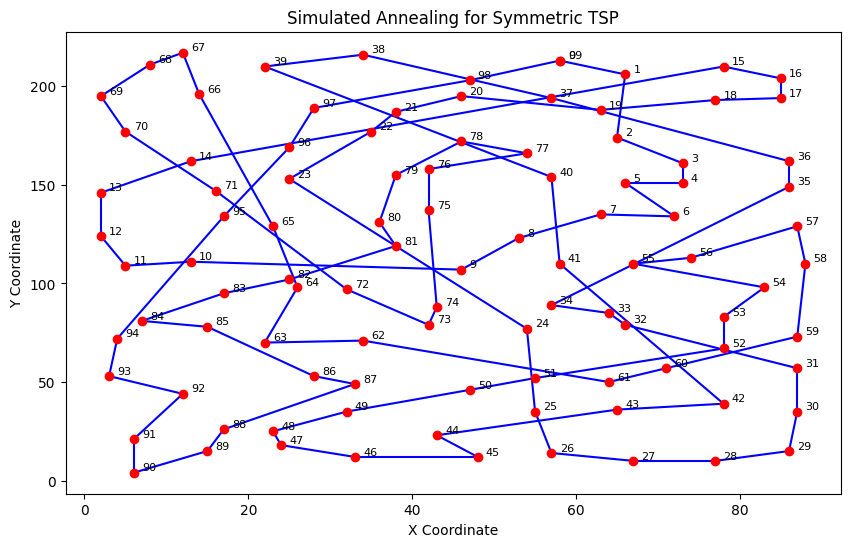

In [14]:
Simulated()